# MNIST

The MNIST dataset is a collection of handwritten images which are used to train a neural network to recognize digits from a paper. MNIST also provides a dataset for testing the neural network.

The training dataset contains 60000 pictures and the test dataset contains 10000 pictures. These datasets are in a special format therefore they have to be read byte by byte. 


# Read the training data set
The dataset has to be read as big endian. The first four bite is the magic number which identifies the fyle type.
The data in this file is a 3 dimensional array:
* Bytes 5 to 8 is the number of pictures in the datatset (The size of the outer array)
* Bytes 9 to 12 is the number of rows (Size of the middle array) 
* Bytes 13 to 16 is the number of collumns (Size of the last array)
* From byte 17 until the end of the file are the pizels of the picures.

### Open the file

There is two ways are provided to aquire the file and its content:

#### Open a local file with gzip
This cell is turned into mark down. The file should be loaded only one way

In [ ]:
#https://docs.python.org/3/library/gzip.html
import gzip
#Unzip the training images

with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:
    
    file_content = f.read()
    
print('File read in')

#### Open a url to download the file and open the downloaded gzip file

In [28]:
#https://stackoverflow.com/questions/2695152/in-python-how-do-i-decode-gzip-encoding
#It is a modified version of Michal Niklas's answer
import gzip
import io
from urllib.request import urlopen
#Download the file
inmemory_file=urlopen('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz').read()
#Open the file
with gzip.open(io.BytesIO(inmemory_file),'rb') as f:
    file_content = f.read()
print('File read in')

File read in


### Do byte confirmation and read the first 16 bytes

In [33]:
#Confirm if the first four byteis 2051
is_it_the_right_bytes=int.from_bytes(file_content[0:4], byteorder='big')==2051
print('Is the magic number correct: %r' % is_it_the_right_bytes)

Is the magic number correct: True


In [34]:
#Number of pictures should be from bytes 4 to 8 and should be read in big endian
pictures_number=int.from_bytes(file_content[4:8], byteorder='big')
print('Number of pictures: %d' % pictures_number)

Number of pictures: 60000


In [35]:
#Number of rows should be from 8 to 12
rows_number=int.from_bytes(file_content[8:12], byteorder='big')
print ('Number of rows: %d' % rows_number)

Number of rows: 28


In [36]:
#Number of columns should be from 12 to 16
columns_number=int.from_bytes(file_content[12:16], byteorder='big')
print ('Number of columns: %d' % columns_number)

Number of columns: 28


The pixels are from byte 16 until the end of the file. Each 784 batch is a picture(28*28)


### Read the data into an array

The esiest way to read the bytes is to do a while loop. The loop has to start from position 16 as until this position the bytes are set for metadata purpose. 

The while loop should run until the last byte is consumed, therefore it runs until the size of the ```file_content``` byte array.

The iteration step is the size of the number of columns in a picture array: 28.

Slices of bytes are taken and converted to int at each iteration from ```file_content```. This converted array is added to a row and the row counter is updated. 

Once a the row counter exceeds the size of pixel rows of each pixel it is reset to the first row and the picture counter is increased by one.

In [38]:
#Import numpy for creating the base array
import numpy as np;
#Import time for the speed measurement
import time

#Print out the size of file_content
print('Content length:'+str(len(file_content)))
# Set up an array for picture storage
training_pictures=np.zeros((pictures_number,rows_number,columns_number),dtype=int)
#The starting time of the algorythm
start_time = time.time()
#Starting off set of loop
offset=16
#The current row a picture 1-28
current_row=1
#The current picture 1-59999
current_image=0
#The iteration index
i=offset
#Run a loop until the end of the byte array    
while i<len(file_content):
    #Convert a row to int types
    a=[c for c in file_content[i:i+columns_number]]
    #Set the row the current picture
    training_pictures[current_image][current_row-1]=a
    #Go to next row
    current_row+=1
    #If the current row is the same as the size of the rows
    if(current_row>rows_number):
        #Set the row to number 1
        current_row=1
        #Go to the next picture
        current_image+=1
    #Increase the counter with the size of the columns    
    i+=columns_number

#Print out the running time of the algorithm
print("Run for %s seconds." % (time.time() - start_time))
#The number of iteartions
print("Number of iterations: %d" % (i/columns_number))


Content length:47040016
Run for 5.687701225280762 seconds.
Number of iterations: 1680000


### Confirm data

To confirm the data was read in correctly, ```matplotlib``` cna be used. This library can plot an array of pixels as a picture.

Three different item can be printed from three different position of the arrray. 
* The first one at index 0
* The middle one at index 30000
* The last one at index 59999

If all three pictures are numbers at the same position on the picture, that means the reading was succesful and there wasn't shifting in the rows or columns.

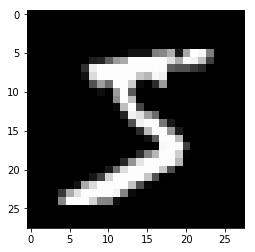

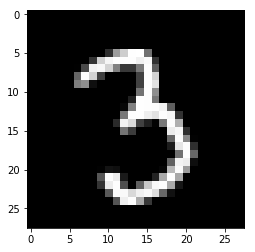

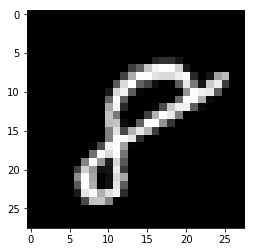

In [39]:
#Inlince complant for jupyter compatibility
%matplotlib inline 
#Import matplotlib 
from matplotlib import pyplot as plt
#Set pyplot to gray scale as the pixels are 0 to 255 on graye scale
plt.gray()
#Plot the first image
plt.imshow(training_pictures[0], interpolation='nearest')
plt.show()
#Plot the middle image
plt.imshow(training_pictures[30000], interpolation='nearest')
plt.show()
#Plot the last image
plt.imshow(training_pictures[59999], interpolation='nearest')
plt.show()